# Pneumonia Detection from X-Ray Images


#### Author : Subharshi Roy 

Around the world, 16% of every death of
children under five worldwide are responsible due to pneumonia. In the United States, near about 1 million people pursue medical aid from hospitals with 50,000 deaths per year [1]. 
Recently, life-threatening pneumonia complicated coronavirus (COVID-19) disease is proclaiming thousands of lives in 2020. 
Pneumonia is an inflammatory lung condition which not only involves a single illness but many different illnesses caused by different microorganisms. 

The disease starts as an upper respiratory tract infection shifting the infection into the lower respiratory tract. 
The respiratory bronchioles and alveolar ducts are constantly exposed to microscopic organisms. 

The flora of the upper respiratory tract (the nasal passages, the pharynx, paranasal sinuses, and the portion of the larynx above the vocal folds) competes with pathogens in demand for nutrients, while in the lower respiratory tract (the bronchi and bronchioles, the trachea, and the alveoli) the cough reflexes, actions of immunoglobulins and complement proteins, aid in expelling out the mucus and foreign substances [2].

The progression of pneumonia depends on the body’s immune response to the infection, the virulence of the causative organism and the organism load of the pre-stage infection [3].


References :

1.https://www.scientificanimations.com/pneumonia/

2.https://en.wikipedia.org/wiki/Respiratory_tract#:~:text=The%20upper%20airways%20or%20upper,%2C%20trachea%2C%20bronchi%20and%20bronchioles. 

3.https://www.visiblebody.com/learn/respiratory/lower-respiratory-system#:~:text=The%20lower%20respiratory%20system%2C%20or,release%20carbon%20dioxide%20in%20exchange.

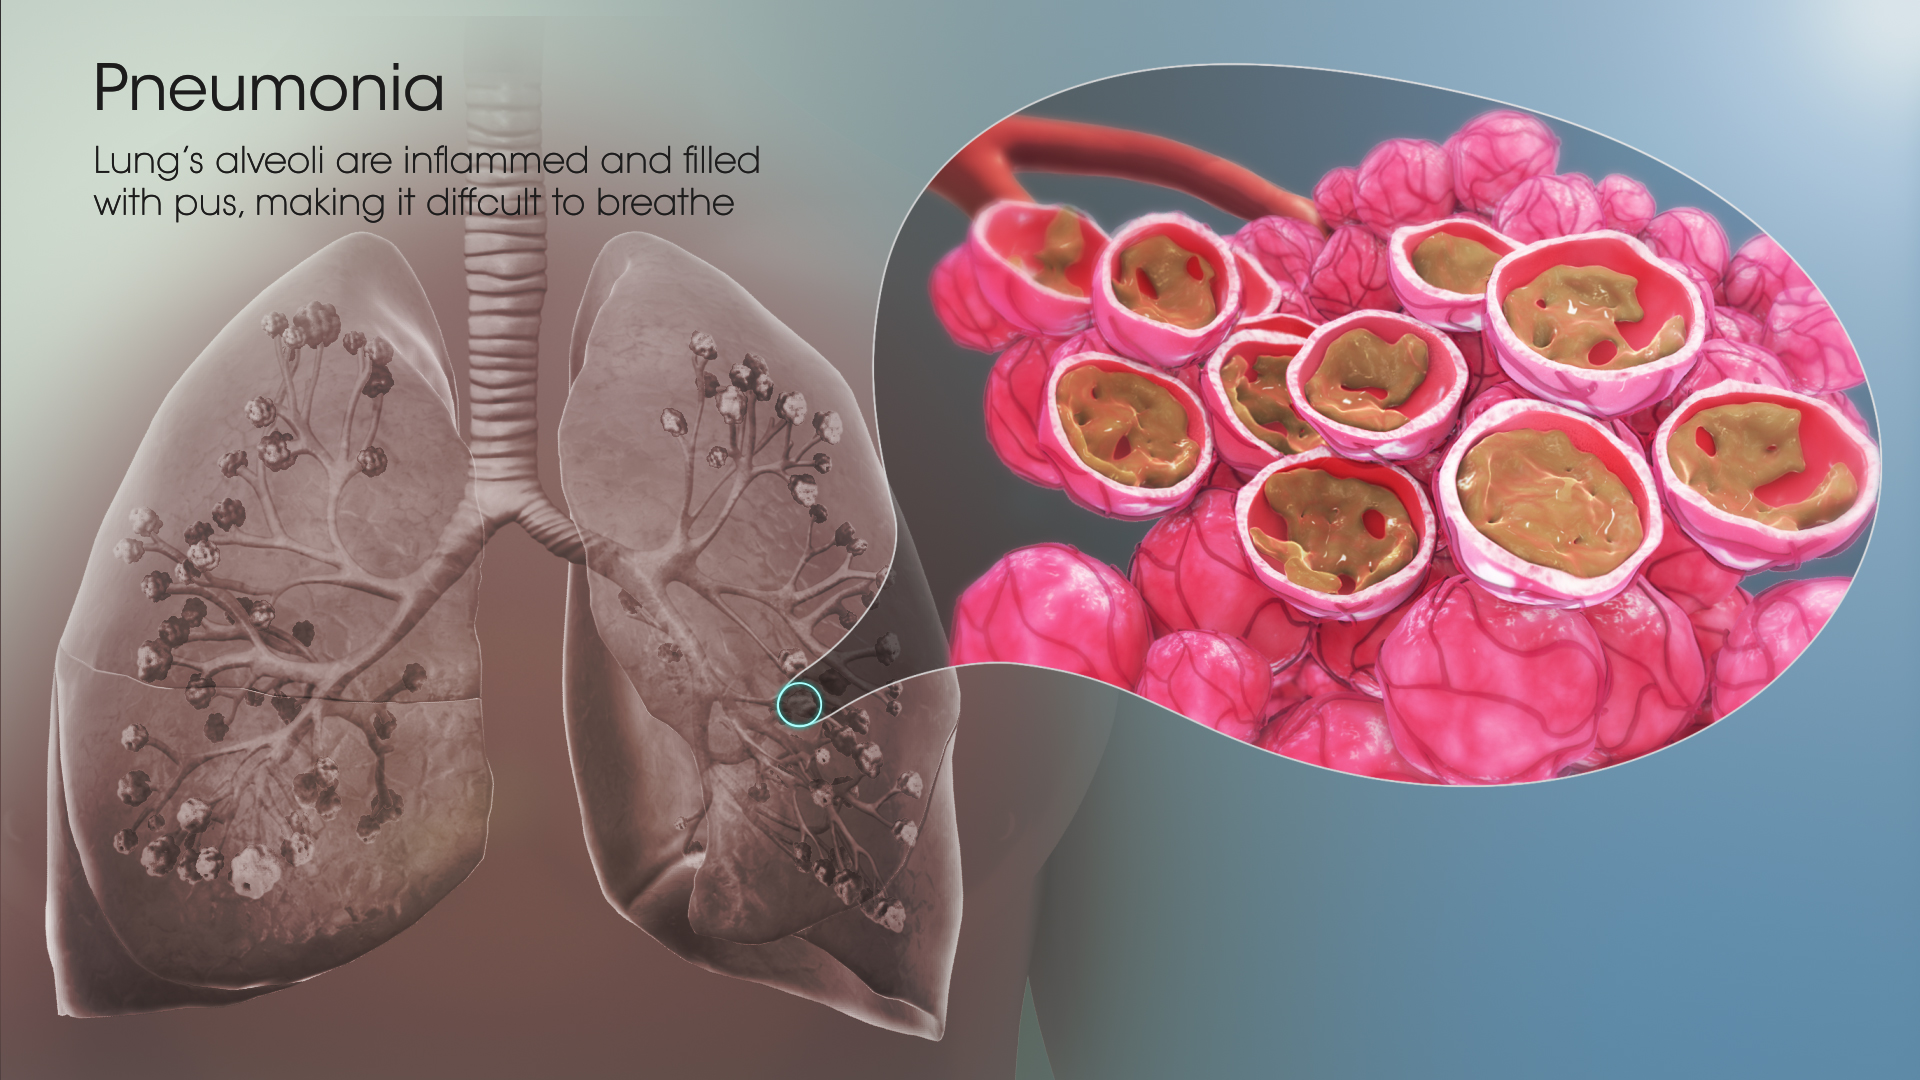

##### Image Source : https://www.scientificanimations.com/pneumonia/

The detection of pneumonia disease is commonly performed through the examination of the chest X-Ray radiograph (CXR). The examination involves the diagnosis of the manifestation of the areas of increased opacity, the further diagnosis is confirmed through clinical history, vital signs and various laboratory examinations.

The pneumonia diagnosis on CXR is hectic due to the presence of other scenarios and conditions in the lungs, such as bleeding, fluid overload, loss in volume, post-radiation or post-surgical changes. 

There is a known difference or variability amongst radiologists in the interpretation or diagnosis of the chest radiographs. 

To improve the efficiency and accuracy of diagnosis, computer-aided systems for pneumonia detection has been widely exploited in the last decade.

Deep learning approaches outperformed or outnumbered conventional machine learning methods in many medical imaging analysis tasks, including detection, classification and segmentation.

# Model Building

### Importing the required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,add
from tensorflow.keras.models  import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import os

### Concept of Transfer Learning

Transfer learning is a machine learning methodology where a developed model targeted for a specific task is "reused" as the "starting" point for a model on a second task.

In transfer learning, a base network is trained on a base dataset and task, and then it is used to "repurpose the learned features or transfer them" to a "second target network" to be trained on a target dataset and task. 

This process will tend to work if the features are general, meaning suitable to both base and target tasks, instead of specific to the base task.

Tensorflow supports transfer learning with a variety of models with pre-trained weights. 

References : 
https://www.youtube.com/watch?v=mPFq5KMxKVw
https://machinelearningmastery.com/transfer-learning-for-deep-learning/
https://www.tensorflow.org/api_docs/python/tf/keras/applications ) 


### VGG16 – Convolutional Neural Network (Classification and Detection)

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

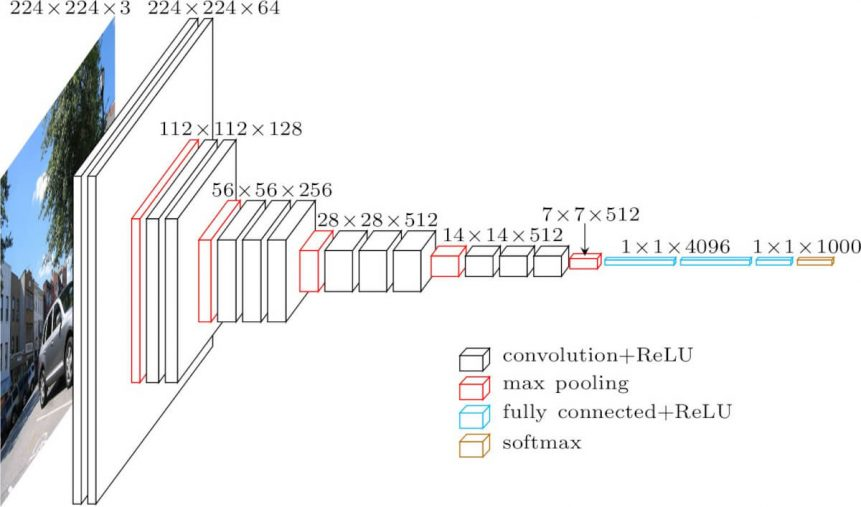

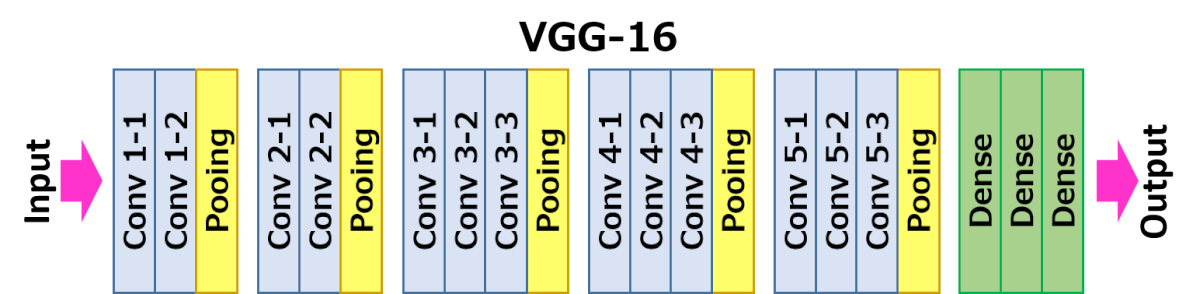

##### Source : https://neurohive.io/en/popular-networks/vgg16/

### Loading the VGG16 mode

In [11]:
# Initializing VGG16 model
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
# include_top = False (loads full model without LAST fully connected layers) 


for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
    
# Flattening out the last layer    
x = Flatten()(vgg.output)


# Adding a dense layer
# To determine if the person is Healthy of Pneumonitic
predictions = Dense(2,activation='softmax')(x) 


model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Data Generator Initialization for trainning the model

In [14]:
# Getting current directory
base_dir = os.getcwd() 

# Defining the input shape
target_shape = (224,224) 

train_dir = base_dir+"\\chest_xray\\train" # 
val_dir = base_dir+"\\chest_xray\\val"     # -- Directories for data
test_dir = base_dir+"\\chest_xray\\test"   # 

#### Loading the VGG16 model with Imagenet weights without the Fully Connected layers

In [17]:
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in vgg.layers:
    layer.trainable = False # Making all the layers non-trainable
    

ImageNet is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories.

Source : https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

Neural network cheatsheet : https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [ ]:
# Flattening out the last layer

x = Flatten()(vgg.output) 
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()


In [19]:
# Making the data loader for training data
train_gen = ImageDataGenerator(rescale=1/255.0,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2) 


# Making the data loader for validation data
test_gen = ImageDataGenerator(rescale=1/255.0) 


# Function to make iterable object for training
train_data_gen = train_gen.flow_from_directory(train_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

# Function to make iterable object for training
test_data_gen = train_gen.flow_from_directory(test_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Compiling and Training the Model

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit_generator(train_data_gen,
        steps_per_epoch=20,
        epochs=20,
        validation_data=test_data_gen,
        validation_steps=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/20
20/20 [==============================] - 146s 7s/step - loss: 0.7598 - accuracy: 0.7437 - val_loss: 0.7461 - val_accuracy: 0.7437
Epoch 2/20
20/20 [==============================] - 157s 8s/step - loss: 0.2187 - accuracy: 0.9219 - val_loss: 0.2444 - val_accuracy: 0.8813
Epoch 3/20
20/20 [==============================] - 152s 8s/step - loss: 0.1829 - accuracy: 0.9125 - val_loss: 0.5046 - val_accuracy: 0.8500
Epoch 4/20
20/20 [==============================] - 155s 8s/step - loss: 0.1139 - accuracy: 0.9563 - val_loss: 0.4137 - val_accuracy: 0.8687
Epoch 5/20
20/20 [==============================] - 156s 8s/step - loss: 0.1366 - accuracy: 0.9469 - val_loss: 0.3754 - val_accuracy: 0.8875
Epoch 6/20
20/20 [==============================] - 155s 8s/step - loss: 0.2289 - accuracy: 0.9094 - val_loss: 0.4930 - val_accuracy: 0.8438
Epoch 7/20
20/20 [==============================] - 159s 8s/st

### Plotting the Accuracy and Loss curves

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot(hist.history["accuracy"], label="train_acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("epochs.png")

NameError: name 'hist' is not defined

<Figure size 432x288 with 0 Axes>

### Saving the Model

In [ ]:
# model.save('model.h5')

##### Image Source : https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a